# Exploratory Data Analysis: AMES House Prices Dataset
## Presented at the School of AI Irving, TX

## Solutions to in-Class exercises

In [71]:
# Load the packages and the dataset

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats # for the QQ plot
import calendar # for variable transformation


# Allow the charts to show directly into the notebook
%matplotlib inline

# Disable "deprecation" warnings
import warnings
warnings.filterwarnings("ignore", category=Warning)

#Load the data
houses = pd.read_csv('data/train.csv')

**Data exploration** 
* Create plots to explore the relationships between the following variables:
    - MSSubclass and SalePrice
    - GarageCars and Garage Area

* Do you think that the feature 'Utilities' is important to predict house prices?  What about HouseStyle? Use data descriptions/plots to answer. 

Text(0.5,1,'Distribution of House Prices by MSSubClass')

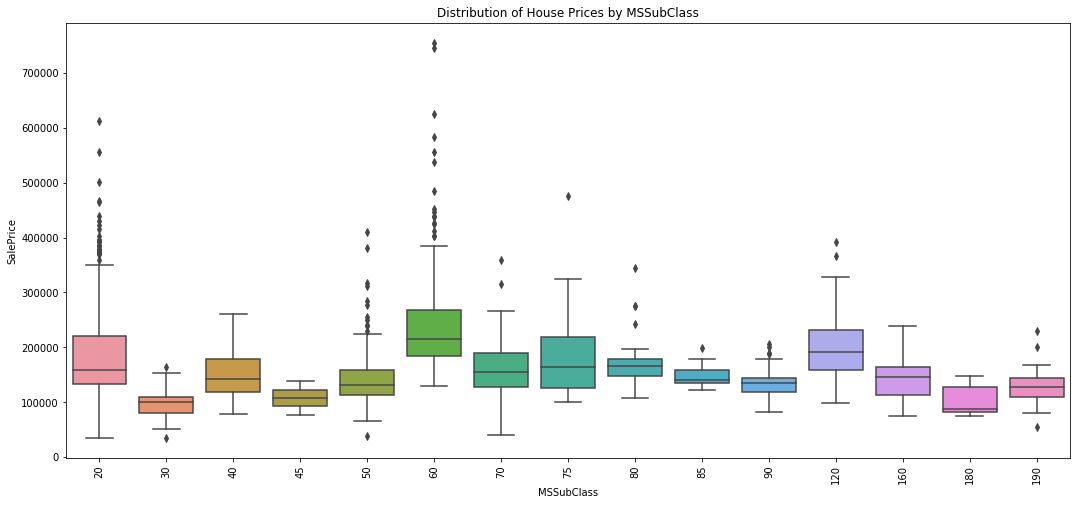

In [61]:
# Create a box plot:
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x='MSSubClass', y="SalePrice", data=houses)
plt.xticks(rotation=90)
ax.set_title('Distribution of House Prices by MSSubClass')

In [60]:
# Remember to convert the variable to categorical
# houses['MSSubClassCat'] = houses['MSSubClass'].astype('category')


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClassCat, dtype: int64

Text(0.5,1,'Garage Cars and Garage Area')

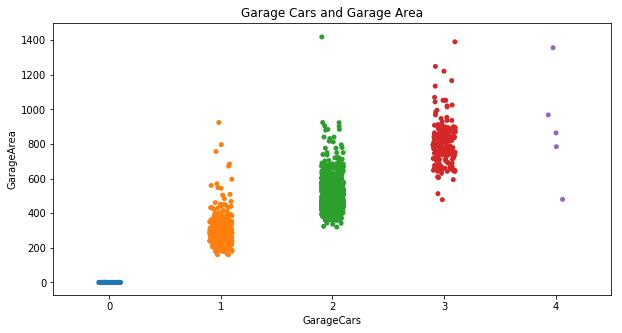

In [64]:
# A nicer jitter plot (or stripplot):
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.stripplot(x='GarageCars', y='GarageArea', data=houses, jitter = True) # We use jitter to bring out the distribution of the data
ax.set_title('Garage Cars and Garage Area')

**Imputation of Null Values**
* Complete the imputation of values for the Fireplace Quality feature, taking into account the 'Fireplaces' data.
* Complete the imputation of values for the Basement features that contain NAs.


In [67]:
# Number of Fireplaces and Fireplaces Quality 

# How many houses do not have Fireplaces?
houses['Fireplaces'][houses['Fireplaces']==0].count()


690

In [69]:
# Does that match the number of houses that do not report fireplace quality?

houses['FireplaceQu'].isna().sum()

690

In [70]:
# Do a simple replacement

houses['FireplaceQu'].fillna('No Fireplace', inplace = True)
houses['FireplaceQu'].value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

**Correlation**

* What would you do with the features that show strong correlations amongst themselves?
One option is to simply drop the correlated variables, leaving only the one that has the highest correlation with the target variable.
For linear regression models, there are ways to deal with correlation. One common way is to call the Variance Inflation Factor (VIG) after running the regression, and then dropping the variables that show a large VIF (rule of thumb: greater than 10)
You can 
* If you wanted to keep the variables, what kind of predictive model would you use?

**Feature Engineering**
* Create a feature that indicates whether a house is new. Do you think that people pay a premium for buying a brand new house? Use plots to determine if this feature could be a useful predictor.
* Convert the Year and Month features to categorical. 

In [ ]:
houses['Month'] = houses['MoSold'].apply(lambda x: calendar.month_name[x])
houses['Month'].value_counts()